<a href="https://colab.research.google.com/github/yumna-prog/Customer-Churn-Prediction/blob/main/CustomerChurnPreduiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the data
- Predict behavior to retain customers.
- 7043 data instance
- Customers who left within the last month – Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
-Demographic info about customers – gender, age range, and if they have partners and dependents

#Understand the problem
- Classification


Connect to the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import dependecies


In [2]:
# 1. Data frame
import pandas as pd
# 2. Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#3. Data splitting
from sklearn.model_selection import train_test_split
#4. Categorical variable
from sklearn.preprocessing import OrdinalEncoder
#5. Models/Feature Selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
import tensorflow as tf
from tensorflow.keras import layers, regularizers
#6. Data Normalization
from sklearn.preprocessing import MinMaxScaler
#7. Class imbalance
from imblearn.over_sampling import SMOTENC


#Understand dataset

In [3]:
#Data loading and setup
Telecommuniction_df=pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

In [4]:
#View the data
Telecommuniction_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#EDA

In [5]:
#Check dataset structure and types
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* The initial dataset doesnt show any missing values
* The data type of TotalCherges is object, which should be converted to float

##Handle incorrect datatypes

In [6]:
#Handle the incorrect data type

#1. Convert the column into numeric type (any value that cannot be converted turns into "Nan")
Telecommuniction_df['TotalCharges'] = pd.to_numeric(Telecommuniction_df['TotalCharges'], errors='coerce')
#2. Convert the column into float type
Telecommuniction_df['TotalCharges'] = Telecommuniction_df['TotalCharges'].astype(float)

In [7]:
#Check for any missing values
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No its observed that TotalChanges column has 11 missing values after the data type convertion

##Handle missing values

In [8]:
# 1) Confirm TotalCharges is count missing values
missing_count = Telecommuniction_df['TotalCharges'].isna().sum()
total = len(Telecommuniction_df)
print(f"Missing TotalCharges: {missing_count} / {total} ({missing_count/total*100:.6f}%)")

Missing TotalCharges: 11 / 7043 (0.156183%)


In [9]:
#Observe the missing values(cross check with other features)
missing_rows = Telecommuniction_df[Telecommuniction_df['TotalCharges'].isna()]
print(missing_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [10]:
#Check if tenure==0 for these rows
print(missing_rows['tenure'].value_counts(dropna=False))

tenure
0    11
Name: count, dtype: int64


It is observed that all the records which have missing values for has 0 aas the corresponding tenure value

tenure = length of time a customer has been a subscriber to a service

*Based on the telecommunication domain customers with tenure=0, will not be having cheges to be paid*

Technique of handling missing values - Imputation

Why imputation -
1. The approach taken to perform imputation is through domain knowledge as explained above, this ensures that a realistic , logical value instead of an arbitrary mean/median.
2. Imputation preserves the original distribution.
3. Reduces noise caused by NaNs and prevents the introduction of spurious patterns

Why not deletion-
1. Dropping rows loses actual customer records. Even 11 rows can represent a meaningful group.
2. Changes the dataset’s distribution and can bias results.


In [11]:
#Using a missing indicator to preserve in information about which rows originally had missing values
Telecommuniction_df['TotalCharges_missing_flag'] =Telecommuniction_df['TotalCharges'].isna().astype(int)

#According to the above oberservation, New customers with tenure = 0 naturally should have TotalCharges = 0
Telecommuniction_df.loc[(Telecommuniction_df['TotalCharges'].isna()) & (Telecommuniction_df['tenure'] == 0), 'TotalCharges'] = 0


In [12]:
#If there are any remaining NaNs
remaining_nans = Telecommuniction_df['TotalCharges'].isna().sum()
print("Remaining NaNs after conditional imputation:", remaining_nans)

Remaining NaNs after conditional imputation: 0


##Handle duplicate values

In [13]:
# Check duplicate values in columns
print(Telecommuniction_df.duplicated(subset=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']))

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [14]:
# Prints the duplicate rows except first
duplicate = Telecommuniction_df[Telecommuniction_df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_missing_flag


No duplicates to be found

## Handle Outliers

/tmp/ipython-input-2249963423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Telecommuniction_df['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

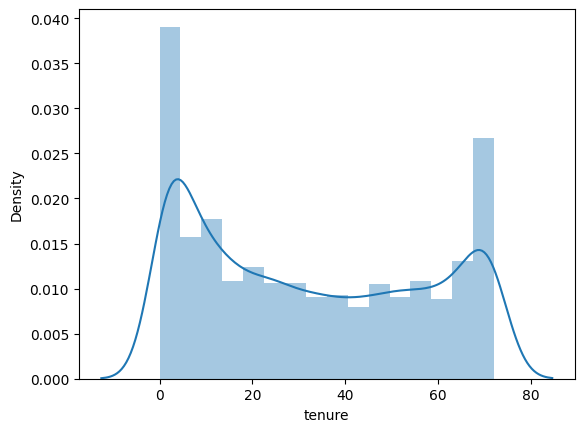

In [15]:
#View the distribution of data with respect to the numerical feature
sns.distplot(Telecommuniction_df['tenure'])

/tmp/ipython-input-2372576284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Telecommuniction_df['MonthlyCharges'])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

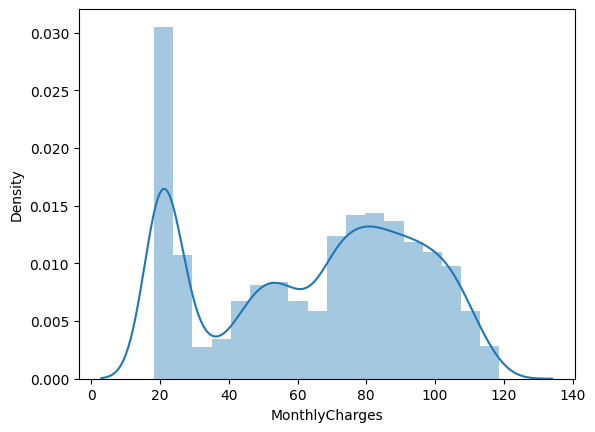

In [16]:
sns.distplot(Telecommuniction_df['MonthlyCharges'])

The distribution is skewed moderately

/tmp/ipython-input-867201806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Telecommuniction_df['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

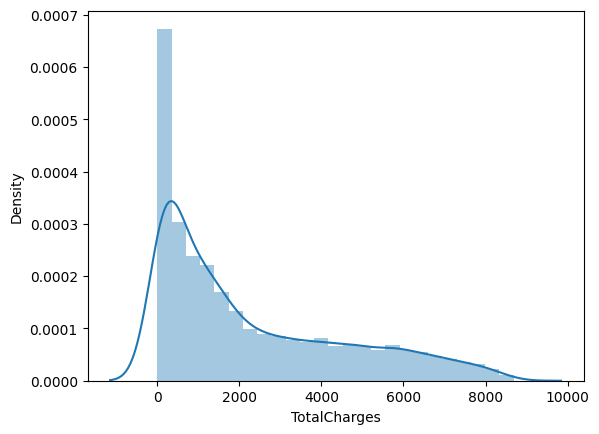

In [17]:
sns.distplot(Telecommuniction_df['TotalCharges'])

The distrinution is right-skewed

### Identifying outliers visually

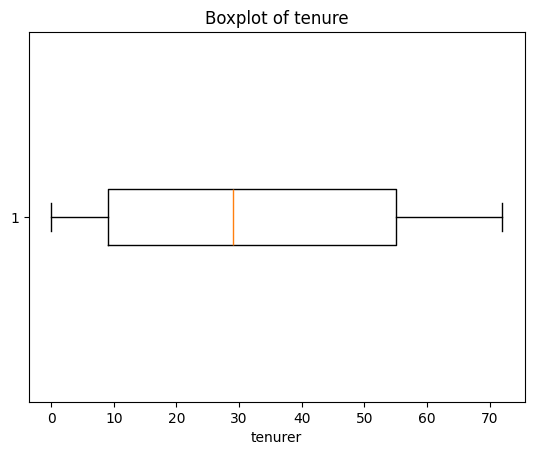

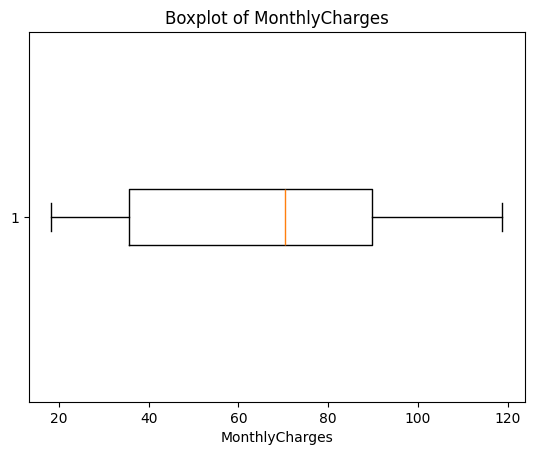

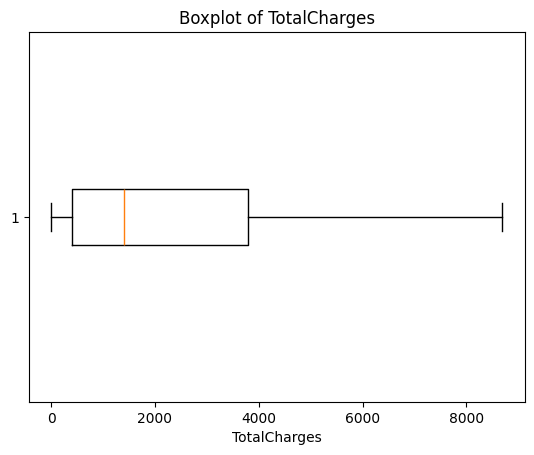

In [18]:
#Checking outliers of numeric columns only
#tenure
plt.boxplot(Telecommuniction_df['tenure'], vert=False)
plt.title("Boxplot of tenure")
plt.xlabel('tenurer')
plt.show()

#MonthlyCharges
plt.boxplot(Telecommuniction_df['MonthlyCharges'], vert=False)
plt.title("Boxplot of MonthlyCharges")
plt.xlabel('MonthlyCharges')
plt.show()

#TotalCharges
plt.boxplot(Telecommuniction_df['TotalCharges'], vert=False)
plt.title("Boxplot of TotalCharges")
plt.xlabel('TotalCharges')
plt.show()


It can be observed that the distributions are skewed

### Method - IQR

Why IRQ-
1. According to the above visual representations we can observe that the data is skewed
2. Unlike z-score or standard deviation methods, IQR uses percentiles (Q1 and Q3) instead of the mean.This makes it insensitive to skewness and extreme values.IQR handles this smoothly.
3. The dataset contains valid extreme values
4. IQR is interpretable and easy to understand
5. Z score assumes that the data is normally distributed
4. Works best foe medium sized datasets

I selected the IQR method for outlier detection because it is a robust, percentile-based technique that does not rely on assumptions about data distribution. The Telco Customer Churn dataset contains natural business variability (such as customers with high tenure or high charges), so methods like z-score or standard deviation would incorrectly classify many valid observations as outliers. The IQR method is ideal because it is unaffected by skewed data, easy to interpret, widely accepted, and accurately identifies only genuine extreme values without removing important customer records. Therefore, it provides the most reliable and appropriate approach for this dataset.


In [19]:
#IQR Method
# Extracting the numeric features
data = Telecommuniction_df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn','TotalCharges_missing_flag'], axis = 1)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers_iqr.sum())


tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


There are no outliers detected in the above features (tenure,MonthlyCharges,ToatalCharges)

##Inconsistent fromat

In [20]:
for col in Telecommuniction_df.select_dtypes(include='object'):
  print(f"\n Unique values in {col}")
  print(Telecommuniction_df[col].unique())


 Unique values in customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 Unique values in gender
['Female' 'Male']

 Unique values in Partner
['Yes' 'No']

 Unique values in Dependents
['No' 'Yes']

 Unique values in PhoneService
['No' 'Yes']

 Unique values in MultipleLines
['No phone service' 'No' 'Yes']

 Unique values in InternetService
['DSL' 'Fiber optic' 'No']

 Unique values in OnlineSecurity
['No' 'Yes' 'No internet service']

 Unique values in OnlineBackup
['Yes' 'No' 'No internet service']

 Unique values in DeviceProtection
['No' 'Yes' 'No internet service']

 Unique values in TechSupport
['No' 'Yes' 'No internet service']

 Unique values in StreamingTV
['No' 'Yes' 'No internet service']

 Unique values in StreamingMovies
['No' 'Yes' 'No internet service']

 Unique values in Contract
['Month-to-month' 'One year' 'Two year']

 Unique values in PaperlessBilling
['Yes' 'No']

 Unique values in PaymentMethod
['Electronic check' 'Maile

In [21]:
for col in Telecommuniction_df.columns:
  print(f"Column :{col}")
  print(Telecommuniction_df[col].unique())
  print("____________")


Column :customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
____________
Column :gender
['Female' 'Male']
____________
Column :SeniorCitizen
[0 1]
____________
Column :Partner
['Yes' 'No']
____________
Column :Dependents
['No' 'Yes']
____________
Column :tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
____________
Column :PhoneService
['No' 'Yes']
____________
Column :MultipleLines
['No phone service' 'No' 'Yes']
____________
Column :InternetService
['DSL' 'Fiber optic' 'No']
____________
Column :OnlineSecurity
['No' 'Yes' 'No internet service']
____________
Column :OnlineBackup
['Yes' 'No' 'No internet service']
____________
Column :DeviceProtection
['No' 'Yes' 'No internet service']
____________
Column :TechSupport
['No' 'Yes' 'No internet service']
___________

No inconsistent format and typographical error


##Statistical analysis

In [22]:
Telecommuniction_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_missing_flag
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.001562
std,0.368612,24.559481,30.090047,2266.794470,0.039492
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


**SeniorCitizen**
- Mean = 0.162 and 75% = 0 ,the dataset is dominated by non-senior customers, this affects the churn patterns as senior citizens show different usage behaviours

**Tenure**
- The median tenure (29 months) suggests that half the customers have been with the company for less than 2.5 years, potentially indicating moderate customer loyalty.

**MonthlyCharges**
- Monthly charges vary significantly among customers, with some paying as low as $18 and others over $118. The right-skewed pattern indicates the presence of premium service customers.

**TotalCharges**
- TotalCharges is highly right-skewed because long-tenure customers accumulate very high total payments.

##Data Visualization

#### Bar Chart - Shows calss imbalance
Why - to identify calss imbalance

<Axes: xlabel='Churn', ylabel='count'>

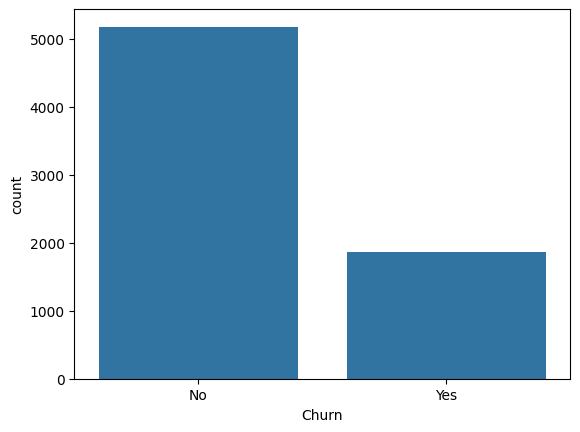

In [23]:
sns.countplot(x='Churn', data=Telecommuniction_df)

Insight - There is a class imbalance. There are more customers thave have not churned compared to the ones that have churned.
Megority of customers, about  are less likely to churn



### Numerical Features

#### Histogram - Shows whether churns differ from non-churners in money spent, contract legnth, etc

Why -
- To understand shape of data
- To understand customer behavior patterns

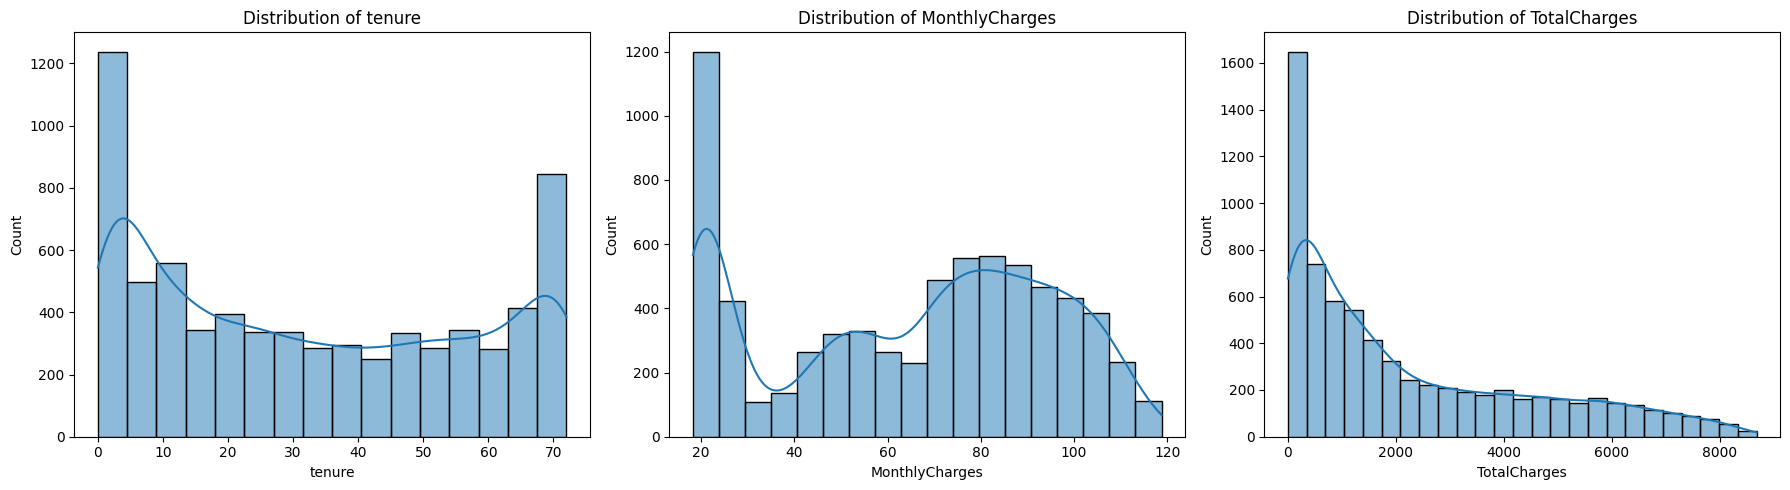

In [24]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(Telecommuniction_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Insights
1. Based on the histogram of tenure, we can observe that megority of the customers are new as the tenure concentration near 0 seems to be the highest
2. the megority  of the cutomers have the least amount of monthly charge, this justifies the observation that many customers are new
3. The histogram with respect to Total cherges indicates that its heavily skewed to the left side. This indicates that many custores are new and therefore is more likely to churn.


#### Boxplot

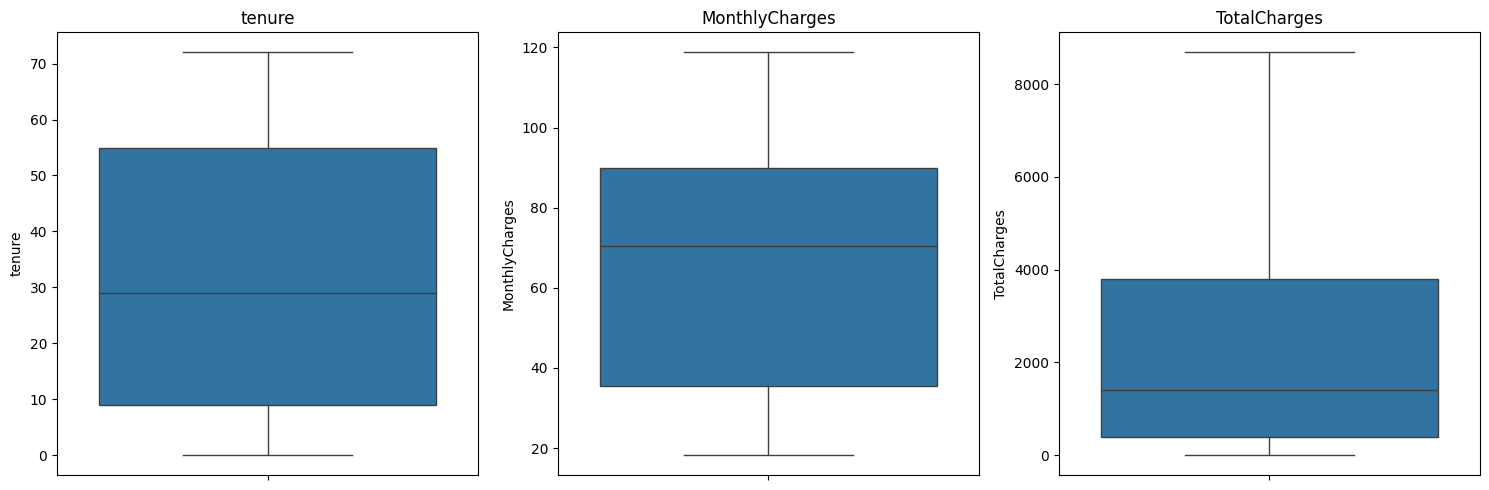

In [25]:
plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)  # create subplots
    sns.boxplot(y=Telecommuniction_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Stacked bar charts - Shows which categories have highest churn rates

Text(0.5, 1.0, 'Churn by Contract Type')

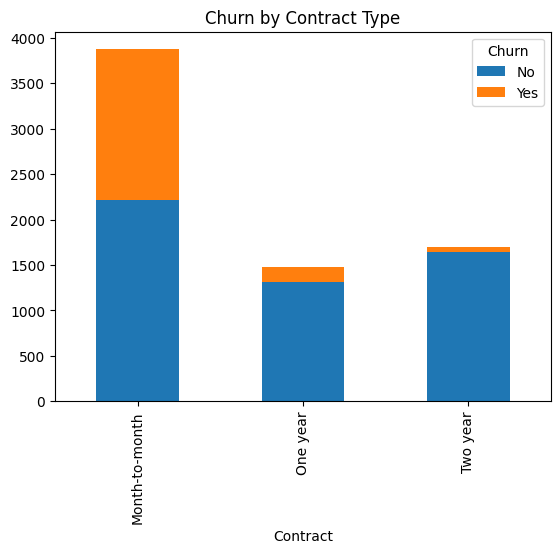

In [26]:
pd.crosstab(Telecommuniction_df['Contract'], Telecommuniction_df['Churn']).plot(kind='bar', stacked=True)
plt.title("Churn by Contract Type")

Insights
1. The customers with the shortest contract has the highest churn rate
2. Customers with longer contracts are less likely to churn

Text(0.5, 1.0, 'Churn by the availability of phone service')

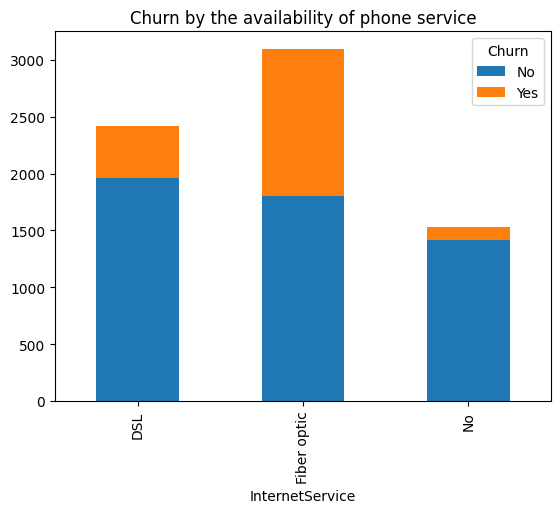

In [27]:
pd.crosstab(Telecommuniction_df['InternetService'], Telecommuniction_df['Churn']).plot(kind='bar', stacked=True)
plt.title("Churn by the availability of phone service")

Insights
1. Customers who have Fiber optice type has the highest churn rate compared to other internet service categories

Text(0.5, 1.0, 'Churn by different payment methods')

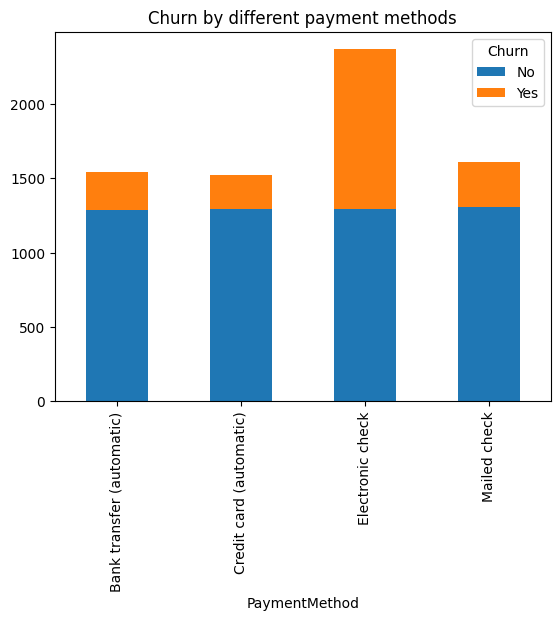

In [28]:
pd.crosstab(Telecommuniction_df['PaymentMethod'], Telecommuniction_df['Churn']).plot(kind='bar', stacked=True)
plt.title("Churn by different payment methods")

Insights
1. The amount of customres of all payment types who are less likey to churn are almost the same
2. Mejority of customers does the payments using Eletronic checks and they are less likey to churnn


#### Correlation Matrix - Shows whether numeric variables are linerly related and detect multicolinearity

Text(0.5, 1.0, 'Correlation Heatmap')

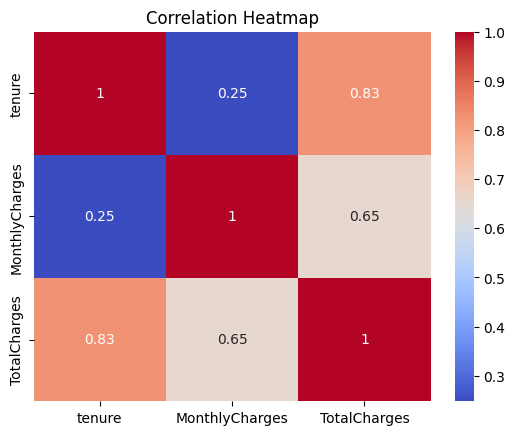

In [29]:
sns.heatmap(Telecommuniction_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

Insights
1. tenure is strongly correlated with TotalCharges

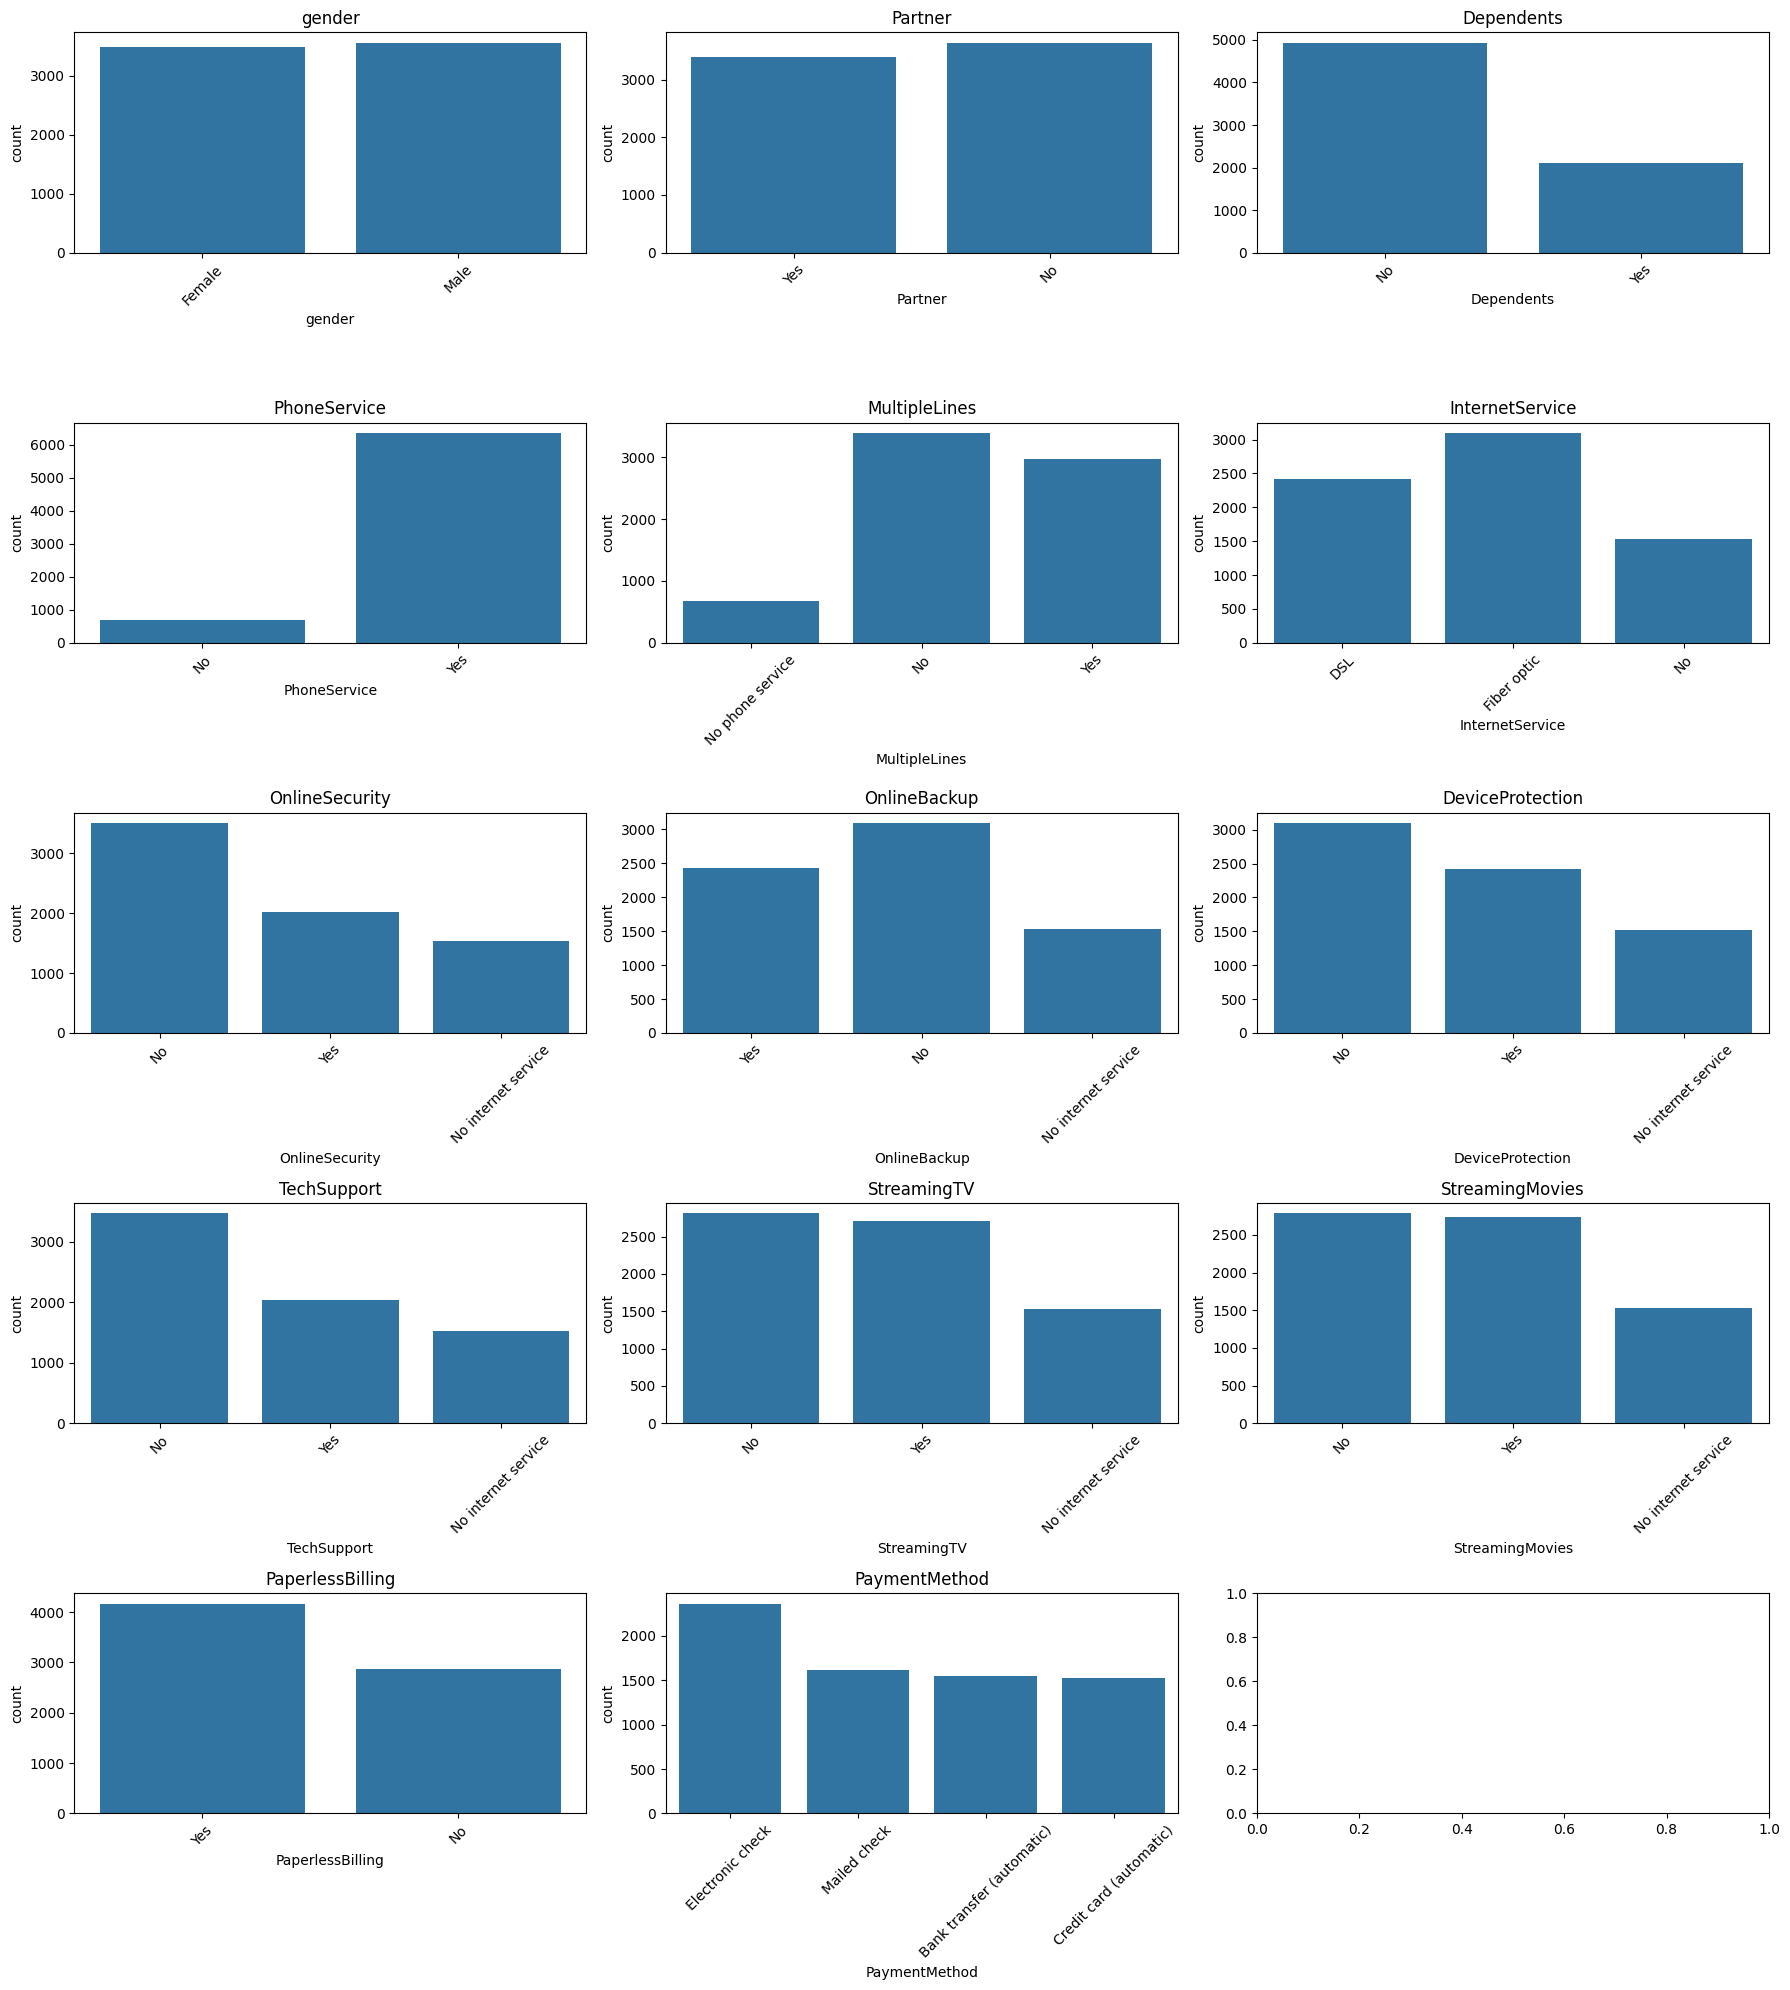

In [30]:
import math

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'
]

rows = math.ceil(len(categorical_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*4))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=Telecommuniction_df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##Excluding unnecessary variables


In [31]:
#Remove obviously usless features(id, constants, variance = 0)
Telecommuniction_df.drop('customerID', axis=1,inplace=True)

In [32]:
num_features_len = len(Telecommuniction_df.columns)
print(num_features_len)

21


##Converting categorical variables

Decide the encoding method
1. One-Hot Encoding(for nominal) -> 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn'
2. Ordinal Encoding(for ordinal) -> 'Contract'

In [33]:
#One hot encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

# 1. Convert categorical variables into dummy/indicator variables
#One-hot encoding
Telecommuniction_df = pd.get_dummies(Telecommuniction_df, columns =categorical_cols, drop_first=True)


In [34]:
Telecommuniction_df.shape

(7043, 31)

In [35]:
#Ordinal Encoding
ord_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
Telecommuniction_df['Contract'] = ord_encoder.fit_transform(Telecommuniction_df[['Contract']])

In [36]:
#Encode the target variable
Telecommuniction_df['Churn'] = Telecommuniction_df['Churn'].map({'Yes': 1, 'No': 0})

In [37]:
Telecommuniction_df.shape

(7043, 31)

##Identifying required Features and lables

In [38]:
#Extract the independent and dependent variables
X = Telecommuniction_df.drop('Churn', axis=1)
y = Telecommuniction_df['Churn']


##Split data

In [39]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Stadadization/Normalization

Since the features are not normally distributed, normalization (Min-Max scaling) is more appropriate, especially for neural networks.

tenure - Normalization

MonthlyCharges -  Normalization

ToatlCharges -  Normalization

In [40]:
#Initialize the MiniMaxScaler
scaler = MinMaxScaler()

#Fit the scaler on the numeric columns and transform them
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test set using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [41]:
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   float64
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   TotalCharges_missing_flag              7043 non-null   int64  
 7   gender_Male                            7043 non-null   bool   
 8   Partner_Yes                            7043 non-null   bool   
 9   Dependents_Yes                         7043 non-null   bool   
 10  PhoneService_Yes                       7043 non-null   bool   
 11  Mult

##Class imbalance

Method - SMOTENC

Why -

In [42]:
# Check class imbalance
from collections import Counter
print("Train class distribution:", Counter(y_train))

Train class distribution: Counter({0: 4138, 1: 1496})


In [43]:
#1. Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['bool']).columns.tolist()

#2. Convert to column indexes
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns ]

#3. Apply SMOTENC
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print()
print("After SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
Churn
0    4138
1    1496
Name: count, dtype: int64

After SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64


##Feature Selection
Why perform -
1. There are 31 features after encoding which is a moderate amount for feature selection to be considered
2. Model conciderations
  - DS - Extra irrelevant features can make the tree larger, more complex, and harder to interpret.
  - NN - irrelevent features will increase noise and slower tarining
3. Some feature seem to be highly correlated(eg: tenure and toatal charges)
4. Improves model accuracy and makes interpretation earsier and clearer

Methods
1. Filter methods - can quickly remove obviously irrelevant features
2. Embedded methods
  - DT - feature importance gives insight directly
  - NN - L1 regularization can reduce irrelevant features.

Filter methods
1. Correlation(Numerical features only)  -> removes weakly predictive numerical features
2. Mutual Information - > Captures non-linear dependency
3. Chi-square test -> tests categorical feature relevance for classification

In [44]:
"""
#1) Correlation
#1. Select only the numerical features
numerical_features = X.select_dtypes(include=['int64','float64'])
#2. Compute correlation with target
correlations = numerical_features.corrwith(y)
#3. Drop features with correlations close to 0
low_corr_features = correlations[correlations.abs() < 0.05].index
print("Low correlation features:", low_corr_features)

X = X.drop(columns=low_corr_features)

#2) Mutual information

#1. Compute MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False)
#2. Drop very low MI features
low_mi_features = mi_scores[mi_scores < 0.01].index
print("Low MI features:", low_mi_features)

X = X.drop(columns=low_mi_features)

#3) Chi-Square Test

#1. Ensure features are non-negative
#2. Apply Chi-Square
chi_scores, p_values = chi2(X, y)
chi_scores = pd.Series(chi_scores, index=X.columns)
p_values = pd.Series(p_values, index=X.columns)

# View results
pd.DataFrame({'Chi2 Score': chi_scores, 'p-value': p_values}).sort_values('p-value')

#3. Drop features with high p-value
insignificant_features = p_values[p_values > 0.05].index
print("Insignificant categorical features:", insignificant_features)

X = X.drop(columns=insignificant_features)

"""


'\n#1) Correlation\n#1. Select only the numerical features\nnumerical_features = X.select_dtypes(include=[\'int64\',\'float64\'])\n#2. Compute correlation with target\ncorrelations = numerical_features.corrwith(y)\n#3. Drop features with correlations close to 0\nlow_corr_features = correlations[correlations.abs() < 0.05].index\nprint("Low correlation features:", low_corr_features)\n\nX = X.drop(columns=low_corr_features)\n\n#2) Mutual information\n\n#1. Compute MI scores\nmi_scores = mutual_info_classif(X, y, random_state=42)\nmi_scores = pd.Series(mi_scores, index=X.columns)\nmi_scores.sort_values(ascending=False)\n#2. Drop very low MI features\nlow_mi_features = mi_scores[mi_scores < 0.01].index\nprint("Low MI features:", low_mi_features)\n\nX = X.drop(columns=low_mi_features)\n\n#3) Chi-Square Test\n\n#1. Ensure features are non-negative\n#2. Apply Chi-Square\nchi_scores, p_values = chi2(X, y)\nchi_scores = pd.Series(chi_scores, index=X.columns)\np_values = pd.Series(p_values, index

Embeded methods
1. Decision Tree Feature importance
2. L1 Regularization

In [45]:
"""
#============== For Decision tree =========================
#1. Train the DS model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#2. Extarct feature importance
importances = dt.feature_importances_
importance_scores = pd.Series(dt.feature_importances_,index=X_train.columns
).sort_values(ascending=False)

#3. Drop features with very low imporatnce
#Why 0.01
low_importance_features = importance_scores[importance_scores < 0.01].index
print("Low importance features:", low_importance_features)


#4. Filter the training and test set
X_train_dt = X_train.drop(columns=low_importance_features)
X_test_dt =  X_test.drop (columns=low_importance_features)


#==================For Neural Network===========================
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

kernel_regularizer=regularizers.l1(0.001)
"""

'\n#============== For Decision tree =========================\n#1. Train the DS model\ndt = DecisionTreeClassifier(random_state=42)\ndt.fit(X_train, y_train)\n\n#2. Extarct feature importance\nimportances = dt.feature_importances_\nimportance_scores = pd.Series(dt.feature_importances_,index=X_train.columns\n).sort_values(ascending=False)\n\n#3. Drop features with very low imporatnce\n#Why 0.01\nlow_importance_features = importance_scores[importance_scores < 0.01].index\nprint("Low importance features:", low_importance_features)\n\n\n#4. Filter the training and test set\nX_train_dt = X_train.drop(columns=low_importance_features)\nX_test_dt =  X_test.drop (columns=low_importance_features)\n\n\n#==================For Neural Network===========================\nmodel = tf.keras.Sequential([\n    layers.Dense(64, activation=\'relu\', \n                 kernel_regularizer=regularizers.l1(0.001)),\n    layers.Dense(32, activation=\'relu\'),\n    layers.Dense(1, activation=\'sigmoid\')\n])\n\n

Hnadle

In [46]:
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   float64
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   TotalCharges_missing_flag              7043 non-null   int64  
 7   gender_Male                            7043 non-null   bool   
 8   Partner_Yes                            7043 non-null   bool   
 9   Dependents_Yes                         7043 non-null   bool   
 10  PhoneService_Yes                       7043 non-null   bool   
 11  Mult